In [16]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
from tensorflow.keras.applications import EfficientNetB0

In [17]:
batch_size = 64
dataset_name = "stanford_dogs"
(ds_train, ds_test), ds_info = tfds.load(dataset_name, split=["train", "test"], with_info=True, as_supervised=True)
NUM_CLASSES = ds_info.features["label"].num_classes

In [18]:
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)
ds_train = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
ds_test = ds_test.map(lambda image, label: (tf.image.resize(image, size), label))

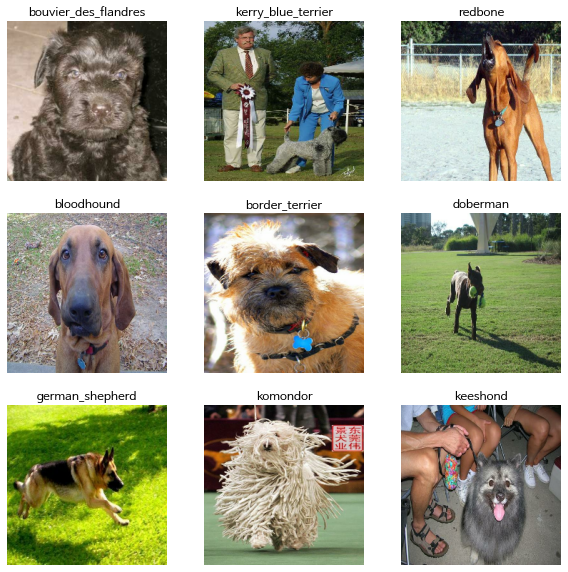

In [19]:
import matplotlib.pyplot as plt

def format_label(label):
    string_label = label_info.int2str(label)
    return string_label.split("-")[1]
label_info = ds_info.features["label"]
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(ds_train.take(9)):
    ax = plt.subplot(3,3, i+1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(f"{format_label(label)}")
    plt.axis("off")

In [20]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers, models

def img_augmentation(x):
    y = preprocessing.RandomRotation(factor=0.15)(x)
    y = preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1)(y)
    y = preprocessing.RandomFlip()(y)
    y = preprocessing.RandomContrast(factor=0.1)(y)
    return y

In [21]:
def input_preprocess(image, label):
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

ds_train = ds_train.map(input_preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.batch(batch_size=batch_size, drop_remainder=True)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

ds_test = ds_test.map(input_preprocess)
ds_test = ds_test.batch(batch_size=batch_size, drop_remainder=True)

In [22]:
def build_eff_model():
    x = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    y = img_augmentation(x)
    outputs = EfficientNetB0(include_top=True, weights=None)
    return tf.keras.models(x, outputs)

In [23]:
model = build_eff_model()

TypeError: 'module' object is not callable